In [73]:
# Importing the required libraries

# NumPy is used for numerical operations, especially for handling arrays and matrices.
import numpy as np

# Pandas is used for data manipulation and analysis, providing data structures like Series and DataFrame.
import pandas as pd

# Matplotlib is used for data visualization. pyplot provides functions to plot graphs and charts.
import matplotlib.pyplot as plt

# Math module provides access to mathematical functions like square root, exponential, etc.
import math


In [74]:
# Loading the dataset manually using NumPy arrays

# x_train represents the input feature: land area in 1000 square feet
x_train = np.array([1.0, 2.0, 3.0])

# y_train represents the target variable: house cost in 1000s of dollars
y_train = np.array([300.0, 500.0, 700.0])


In [75]:
# This function computes the cost for linear regression using Mean Squared Error (MSE)

# Parameters:
# x : array of input features (e.g., land area)
# y : array of target values (e.g., house price)
# w : weight (slope of the line)
# b : bias (y-intercept or constant term)

def compute_cost(x, y, w, b):
    m = x.shape[0]  # Number of training examples
    cost = 0        # Initialize the cost to zero

    # Loop through each training example
    for i in range(m):
        f_wb = w * x[i] + b  # Linear prediction (f(x) = wx + b)
        cost = cost + (f_wb - y[i])**2  # Squared error between prediction and actual value

    # Final cost: Mean Squared Error divided by 2 (for easier derivative computation later)
    total_cost = 1 / (2 * m) * cost

    return total_cost  # Return the average cost


In [76]:
# This function computes the gradients (partial derivatives) of the cost function
# with respect to the parameters w (weight) and b (bias) for linear regression.

# Parameters:
# x : array of input features
# y : array of target values
# w : current value of weight
# b : current value of bias

def compute_gradient(x, y, w, b):
    m = x.shape[0]  # Number of training examples
    dj_dw = 0       # Gradient of cost with respect to w (slope)
    dj_db = 0       # Gradient of cost with respect to b (intercept)

    # Loop through each training example to compute the partial derivatives
    for i in range(m):
        f_wb = w * x[i] + b           # Model prediction for example i
        dj_dw_i = (f_wb - y[i]) * x[i]  # Partial derivative w.r.t. w for example i
        dj_db_i = (f_wb - y[i])         # Partial derivative w.r.t. b for example i
        dj_dw += dj_dw_i              # Accumulate gradient for w
        dj_db += dj_db_i              # Accumulate gradient for b

    # Average gradients over all examples
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db  # Return the gradients for weight and bias


In [77]:
# This function performs gradient descent to minimize the cost function and find optimal values for w and b.

# Parameters:
# x, y               : Input features and target values
# w_in, b_in         : Initial guesses for weight and bias
# alpha              : Learning rate (step size for each iteration)
# num_iters          : Number of iterations to run gradient descent
# cost_function      : Function to compute the cost (used for logging progress)
# gradient_function  : Function to compute gradients with respect to w and b

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    j_history = []  # List to store the cost at each iteration (for visualization/debugging)
    p_history = []  # List to store parameters w and b at each iteration
    b = b_in        # Initialize bias
    w = w_in        # Initialize weight

    # Loop for the specified number of iterations
    for i in range(num_iters):
        # Compute gradients for current values of w and b
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update parameters using gradient descent formula
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost and parameters for analysis if needed
        if i < 100000:
            j_history.append(cost_function(x, y, w, b))  # Save cost value
            p_history.append([w, b])                     # Save current parameters

        # Print cost and parameters every 10% of iterations (for monitoring)
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} ",
                  f"w : {w: 0.3e}, b : {b: 0.5e}")

    # Return the final parameters and the history of cost and parameters
    return w, b, j_history, p_history


In [78]:
# Initialize parameters for gradient descent
w_init = 0          # Initial weight (slope)
b_init = 0          # Initial bias (intercept)
iterations = 10000  # Number of iterations to run
tmp_alpha = 1.0e-2  # Learning rate (step size)

# Run the gradient descent function to optimize w and b
w_final, b_final, j_hist, p_hist = gradient_descent(
    x_train,          # Input features
    y_train,          # Target values
    w_init,           # Initial weight
    b_init,           # Initial bias
    tmp_alpha,        # Learning rate
    iterations,       # Number of iterations
    compute_cost,     # Cost function
    compute_gradient  # Gradient function
)

# Print the final values of w and b found by gradient descent
print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")


Iteration    0: Cost 1.23e+05  dj_dw: -1.133e+03, dj_db: -5.000e+02  w :  1.133e+01, b :  5.00000e+00
Iteration 1000: Cost 6.55e-01  dj_dw:  1.600e-01, dj_db: -3.636e-01  w :  2.013e+02, b :  9.69785e+01
Iteration 2000: Cost 5.91e-02  dj_dw:  4.805e-02, dj_db: -1.092e-01  w :  2.004e+02, b :  9.90924e+01
Iteration 3000: Cost 5.33e-03  dj_dw:  1.443e-02, dj_db: -3.281e-02  w :  2.001e+02, b :  9.97274e+01
Iteration 4000: Cost 4.81e-04  dj_dw:  4.335e-03, dj_db: -9.855e-03  w :  2.000e+02, b :  9.99181e+01
Iteration 5000: Cost 4.34e-05  dj_dw:  1.302e-03, dj_db: -2.960e-03  w :  2.000e+02, b :  9.99754e+01
Iteration 6000: Cost 3.92e-06  dj_dw:  3.912e-04, dj_db: -8.893e-04  w :  2.000e+02, b :  9.99926e+01
Iteration 7000: Cost 3.53e-07  dj_dw:  1.175e-04, dj_db: -2.671e-04  w :  2.000e+02, b :  9.99978e+01
Iteration 8000: Cost 3.19e-08  dj_dw:  3.530e-05, dj_db: -8.024e-05  w :  2.000e+02, b :  9.99993e+01
Iteration 9000: Cost 2.88e-09  dj_dw:  1.060e-05, dj_db: -2.410e-05  w :  2.000e+0

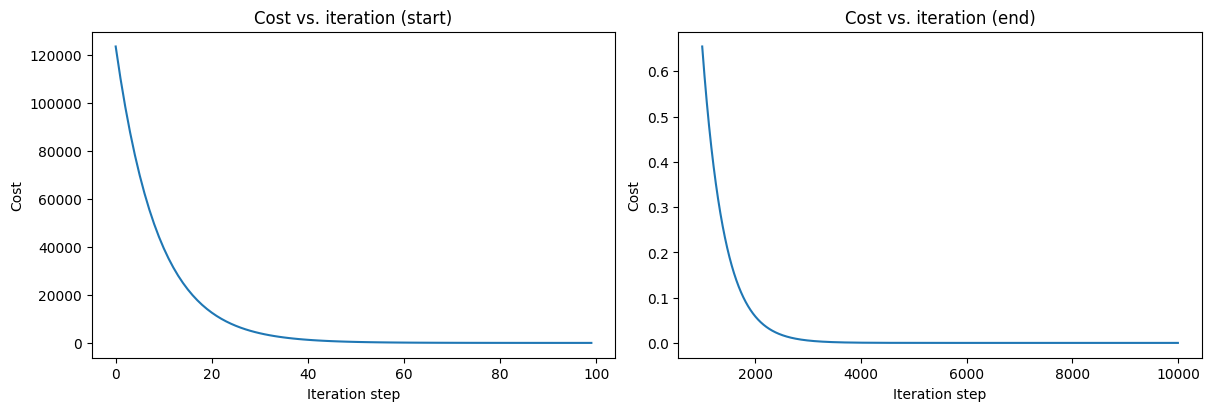

In [79]:
# Visualizing the cost function's change over iterations

# Create a figure with 1 row and 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

# Plot the cost history for the first 100 iterations (to show early changes)
ax1.plot(j_hist[:100])

# Plot the cost history after 1000 iterations (to show long-term behavior and convergence)
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])

# Set titles and labels for both subplots
ax1.set_title("Cost vs. iteration (start)")      # Title for early iterations
ax2.set_title("Cost vs. iteration (end)")        # Title for later iterations
ax1.set_ylabel('Cost');    ax2.set_ylabel('Cost')    # Y-axis label
ax1.set_xlabel('Iteration step'); ax2.set_xlabel('Iteration step')  # X-axis label

# Display the plots
plt.show()


In [80]:
# Making predictions using the learned model parameters (w_final and b_final)

# Predicting the price of houses given different land areas
# The prediction uses the linear model: price = w * area + b

print(f"1000 sqft house prediction  {w_final * 1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction  {w_final * 1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction  {w_final * 2.0 + b_final:0.1f} Thousand dollars")
print(f"2500 sqft house prediction  {w_final * 2.5 + b_final:0.1f} Thousand dollars")
print(f"2725 sqft house prediction  {w_final * 2.725 + b_final:0.1f} Thousand dollars")
print(f"3000 sqft house prediction  {w_final * 3.0 + b_final:0.1f} Thousand dollars")


1000 sqft house prediction  300.0 Thousand dollars
1200 sqft house prediction  340.0 Thousand dollars
2000 sqft house prediction  500.0 Thousand dollars
2500 sqft house prediction  600.0 Thousand dollars
2725 sqft house prediction  645.0 Thousand dollars
3000 sqft house prediction  700.0 Thousand dollars
